In [1]:
import pandas as pd
import zipfile
import io
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [3]:
spiral_train_dir = r'C:\Project\Dataset\spiral\training'
spiral_test_dir = r'C:\Project\Dataset\spiral\testing'


In [4]:
spiral_train_datagen = ImageDataGenerator(rescale=1./255)
spiral_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128



In [5]:
# Define training and testing generators
spiral_train_generator = spiral_train_datagen.flow_from_directory(
    spiral_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

spiral_test_generator = spiral_test_datagen.flow_from_directory(
    spiral_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)



Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])



In [7]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [8]:
# Train the model
model.fit(
    spiral_train_generator,
    steps_per_epoch=len(spiral_train_generator),
    epochs=50,
    validation_data=spiral_test_generator,
    validation_steps=len(spiral_test_generator)
)


Epoch 1/50


3/3 [==============================] - 6s 936ms/step - loss: 3.2937 - accuracy: 0.5000 - val_loss: 0.7260 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 391ms/step - loss: 0.7125 - accuracy: 0.5000 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 386ms/step - loss: 0.7248 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 374ms/step - loss: 0.6949 - accuracy: 0.4722 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 545ms/step - loss: 0.7014 - accuracy: 0.4444 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 1s 467ms/step - loss: 0.6953 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 568ms/step - loss: 0.6981 - accuracy: 0.5000 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==

In [9]:
print(f'Final Test Accuracy: {model.evaluate(spiral_train_generator)[1]:.4f}')

3/3 [==============================] - 1s 120ms/step - loss: 0.3618 - accuracy: 0.8472
Final Test Accuracy: 0.8472


In [10]:
import os

strain_dir = r"C:\Project\Dataset\spiral\training"
stest_dir = r"C:\Project\Dataset\spiral\testing"

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)

Class names: ['healthy', 'parkinson']


In [11]:
model.save("model.h5")

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


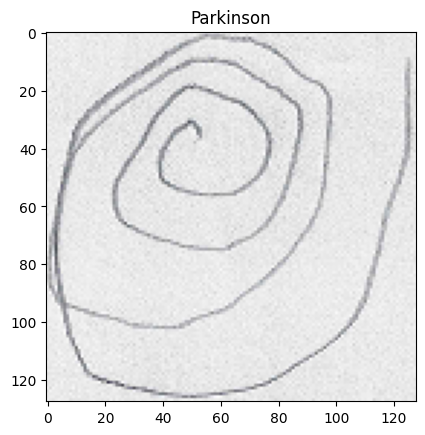

1/1 [==============================] - 1s 561ms/step
Prediction: [0.7478309 0.2521691]
Image can be printed.


In [12]:
from keras.models import load_model

def load_samples(paths, model, class_index):
    for path in paths:
        img = image.load_img(path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")

model_path = r"C:\Project\model.h5"
model = load_model(model_path)

image_paths = [r"C:\Project\Dataset\spiral\training\parkinson\V01PE03.png"]
allowed_class_index = [0, 1]  

load_samples(image_paths, model, allowed_class_index)



In [13]:
wave_train_dir = r'C:\Project\Dataset\wave\training'
wave_test_dir = r'C:\Project\Dataset\wave\testing'

In [14]:
wave_train_datagen = ImageDataGenerator(rescale=1./255)
wave_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128


In [15]:
# Define training and testing generators
wave_train_generator = wave_train_datagen.flow_from_directory(
    wave_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

wave_test_generator = wave_test_datagen.flow_from_directory(
    wave_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)


Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [16]:
# Define the classifier
classifier = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])


In [17]:
# Compile the classifier
classifier.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [18]:
# Train the classifier
classifier.fit(
    wave_train_generator,
    steps_per_epoch=len(wave_train_generator),
    epochs=50,
    validation_data=wave_test_generator,
    validation_steps=len(wave_test_generator)
)

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 1.6329 - accuracy: 0.3889 - val_loss: 0.7487 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 2s 550ms/step - loss: 0.7165 - accuracy: 0.5556 - val_loss: 0.7346 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 753ms/step - loss: 0.7269 - accuracy: 0.5000 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 2s 472ms/step - loss: 0.6982 - accuracy: 0.5000 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 2s 539ms/step - loss: 0.6989 - accuracy: 0.4722 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 2s 502ms/step - loss: 0.6919 - accuracy: 0.4722 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 2s 493ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5667
Epoch 8/50
3/3 [=======

In [19]:
print(f'Final Test Accuracy: {classifier.evaluate(wave_train_generator)[1]:.4f}')

3/3 [==============================] - 1s 177ms/step - loss: 0.0048 - accuracy: 1.0000
Final Test Accuracy: 1.0000


In [20]:
import os

wtrain_dir = r"C:\Project\Dataset\wave\training"
wtest_dir = r"C:\Project\Dataset\wave\testing"

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)

Class names: ['healthy', 'parkinson']


In [21]:
classifier.save("classifier.h5")

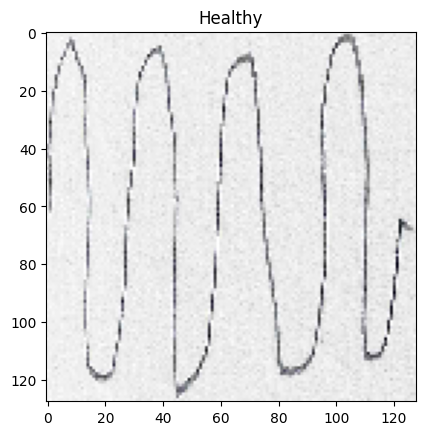

1/1 [==============================] - 0s 251ms/step
Prediction: [1.0000000e+00 1.9851218e-08]
Image can be printed.


In [22]:
from keras.models import load_model

def load_samples(paths, classifier, class_index):
    for path in paths:
        img = image.load_img(path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(path)).capitalize())  
        plt.show()

        # Predict using the classifier
        prediction = classifier.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")

classifier_path = r"C:\Project\classifier.h5"
classifier = load_model(classifier_path)

image_paths = [r"C:\Project\Dataset\wave\training\healthy\V01HO02.png"]
allowed_class_index = [0, 1]  

load_samples(image_paths, classifier, allowed_class_index)


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [24]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      